In [9]:
import pandas as pd

df = pd.read_csv('./Dataset/SMSSpamCollection', 
                 sep='\\t',
                 header=None,
                 names=['label','sms'])
df.head()

C:\Users\MyPc\AppData\Local\Temp\ipykernel_9700\2058533203.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('./Dataset/SMSSpamCollection',


,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df ['label'].value_counts()

label
ham     4827
spam     747
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelBinarizer

X = df['sms'].values 
y = df['label'].values 
   
lb = LabelBinarizer()
y = lb.fit_transform(y).ravel()
lb.classes_

array(['ham', 'spam'], dtype='<U4')

In [12]:
from sklearn.model_selection import train_test_split
    
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0)
print(X_train,'\\n')
print(y_train)

['The whole car appreciated the last two! Dad and are having a map reading semi argument but apart from that things are going ok. P.'
 'Its going good...no problem..but still need little experience to understand american customer voice...'
 'U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd. Cust care 07821230901'
 ...
 "For ur chance to win a £250 cash every wk TXT: ACTION to 80608. T's&C's www.movietrivia.tv custcare 08712405022, 1x150p/wk"
 'R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO 2 MY HOUSE'
 'Mm feeling sleepy. today itself i shall get that dear'] \n
[0 0 1 ... 1 0 0]


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
    
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print(X_train_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 32567 stored elements and shape (4180, 7229)>
  Coords	Values
  (0, 1523)	0.2522205285529818
  (0, 950)	0.34601811702744634
  (0, 2004)	0.26850437452626374
  (0, 3144)	0.24406713073621866
  (0, 4075)	0.3339371810430319
  (0, 5242)	0.2954584201645996
  (0, 5637)	0.36304523996639637
  (0, 977)	0.3339371810430319
  (0, 931)	0.34601811702744634
  (0, 6417)	0.24406713073621866
  (0, 2963)	0.1890582237517172
  (0, 4588)	0.16681422169631532
  (1, 2963)	0.23169283059508544
  (1, 2974)	0.21420182174707136
  (1, 5075)	0.3090988957527331
  (1, 4417)	0.23128599724906077
  (1, 3893)	0.3109705256571213
  (1, 2533)	0.38044335706471133
  (1, 6688)	0.3571823267389251
  (1, 873)	0.4092435080655983
  (1, 1987)	0.28947213851738335
  (1, 6845)	0.36208738415414404
  (2, 5609)	0.24076916057618364
  (2, 774)	0.24670734978621686
  (2, 5405)	0.4934146995724337
  :	:
  (4177, 6741)	0.142007724207017
  (4177, 6641)	0.1640423172769546
  (4177, 7020)	0.1

In [15]:
from sklearn.linear_model import LogisticRegression
    
model = LogisticRegression()
model.fit(X_train_tfidf, y_train) 
y_pred = model.predict(X_test_tfidf) 
   
for pred, sms in zip (y_pred[:5],X_test[:5]):
       print(f'PRED: {pred} - SMS: {sms}\\n')

PRED: 0 - SMS: That's cool he'll be here all night, lemme know when you're around\n
PRED: 0 - SMS: Sorry, I'll call later In meeting.\n
PRED: 0 - SMS: alright. Thanks for the advice. Enjoy your night out. I'ma try to get some sleep...\n
PRED: 0 - SMS: Ok. Can be later showing around 8-8:30 if you want + cld have drink before. Wld prefer not to spend money on nosh if you don't mind, as doing that nxt wk.\n
PRED: 0 - SMS: Yes..he is really great..bhaji told kallis best cricketer after sachin in world:).very tough to get out.\n


In [16]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test,y_pred)
matrix

array([[1195,    3],
       [  53,  143]])

In [17]:
tn, fp, fn, tp = matrix.ravel() 

print(f'TN: {tn}')
print(f'FP: {fp}')
print(f'FN: {fn}')
print(f'TP: {tp}')

TN: 1195
FP: 3
FN: 53
TP: 143


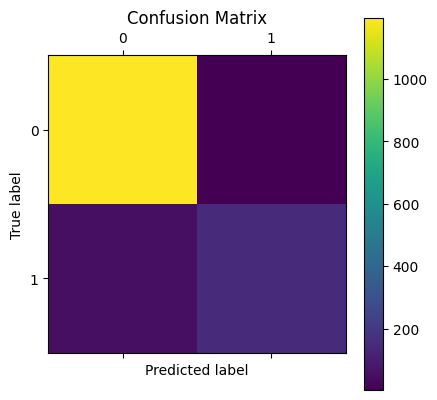

In [18]:
import matplotlib.pyplot as plt

plt.matshow(matrix)
plt.colorbar()
    
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9598278335724534

In [20]:
from sklearn.metrics import precision_score

precision_score (y_test,y_pred)

np.float64(0.9794520547945206)

In [21]:
from sklearn.metrics import recall_score
recall_score (y_test,y_pred)

np.float64(0.7295918367346939)

In [22]:
from sklearn.metrics import f1_score

f1_score(y_test,y_pred)

np.float64(0.8362573099415205)

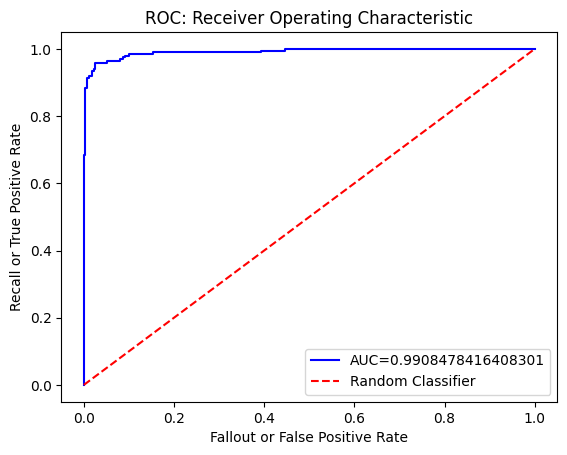

In [26]:
from sklearn.metrics import roc_curve, auc

prob_estimates = model.predict_proba(X_test_tfidf)
   
fpr, tpr, treshhold = roc_curve(y_test, prob_estimates[:,1])
nilai_auc = auc (fpr,tpr)
 
plt.plot(fpr,tpr,'b',label=f'AUC={nilai_auc}')
plt.plot([0,1], [0,1], '--r', label='Random Classifier')
   
plt.title('ROC: Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.legend()
plt.show()e